## 1. Importing and Understanding Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# Importing Housing.csv
bike_df = pd.read_csv('bike_share.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2]:
#dropping unwanted columns
#remove casual and registered columns as cnt column is sum of both of these

bike_df.drop(['casual','registered','instant','dteday'],axis = 1,inplace = True)

In [3]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [4]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [5]:
#mapping columns
bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df.mnth = bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [6]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 2. Visualizing the data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

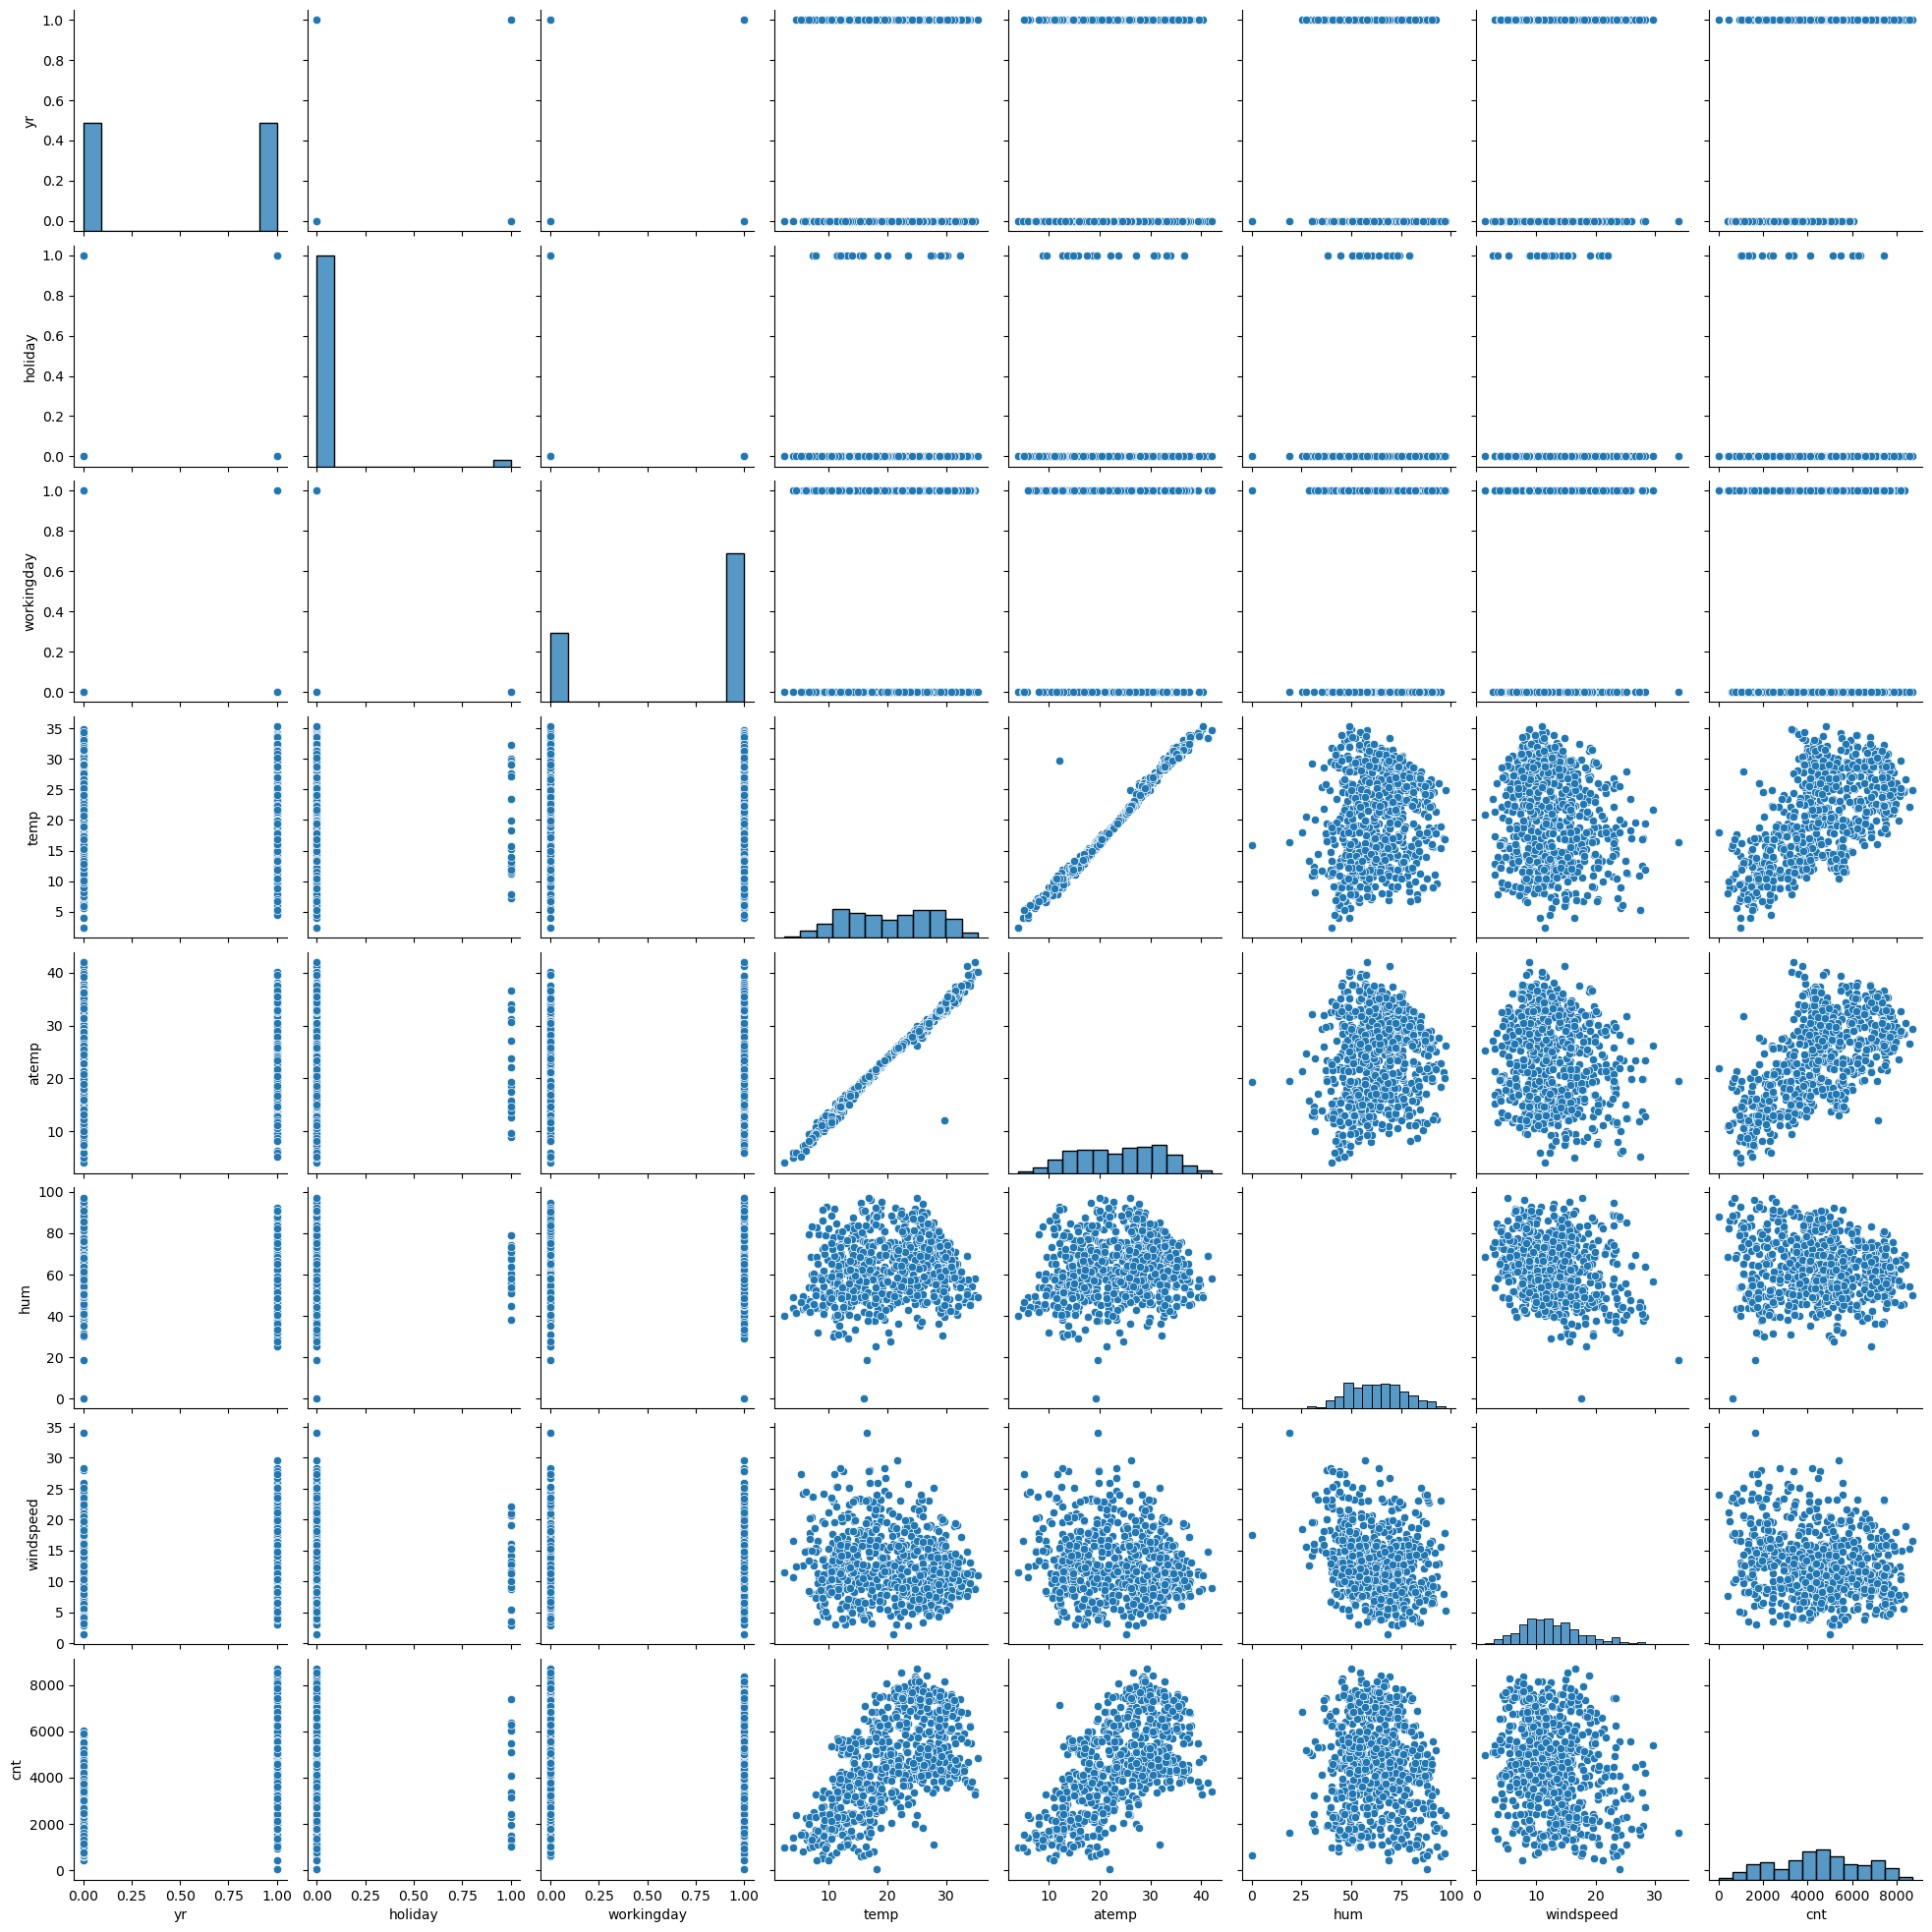

In [8]:
sns.pairplot(bike_df)
plt.show()

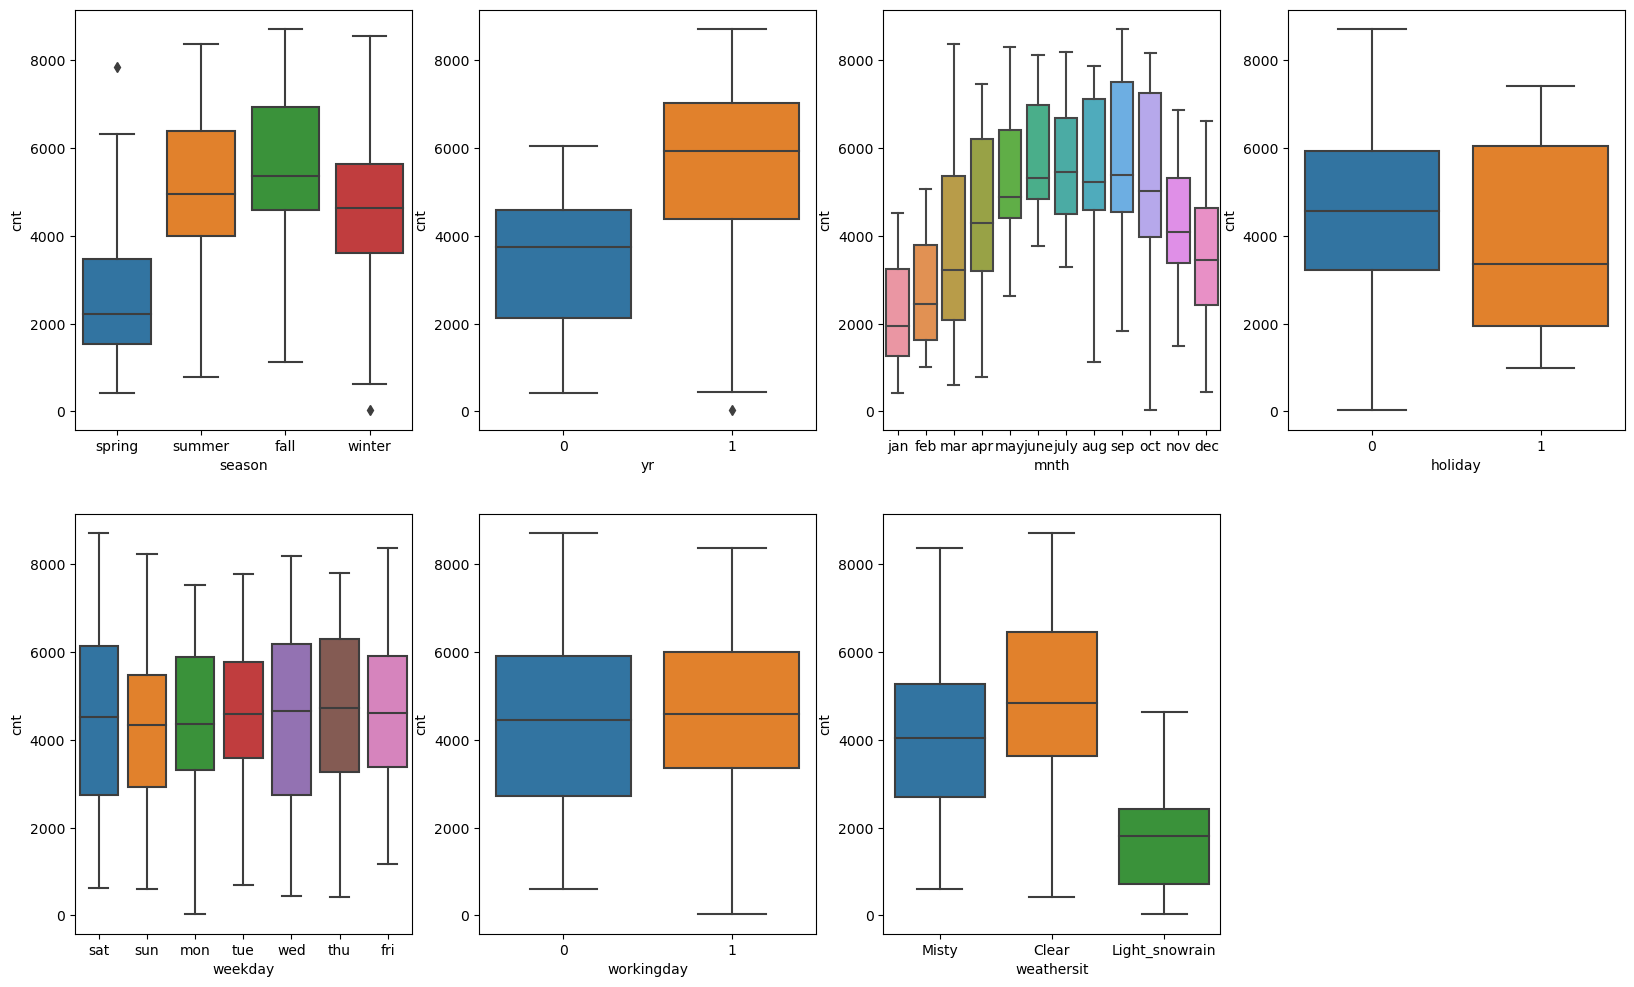

In [9]:
#visualizing the categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.show()

### Categorical column analysis

- there are more riders on clear day and fall season
- Working-day/holiday doesnt seem to have an impact on number of riders
- september has highest number of riders

## 3. Data Preparation

In [10]:
# Dummy variable creation for month, weekday, weathersit and season variables.

seasons_df=pd.get_dummies(bike_df.season,drop_first=True,dtype=int)
months_df=pd.get_dummies(bike_df.mnth,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(bike_df.weekday,drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True,dtype=int)

In [11]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_df = pd.concat([bike_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [12]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [13]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    int64  
 13  dec             730 non-null    int64  
 14  feb             730 non-null    int64  
 15  jan             730 non-null    int64  
 16  july            730 non-null    int64  
 17  june            730 non-null    int

In [14]:
#dropping columns where dummies are already substituted
bike_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

## 4. Divide data into train and test

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
df_train.shape

(510, 30)

In [17]:
# Scaling features

scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


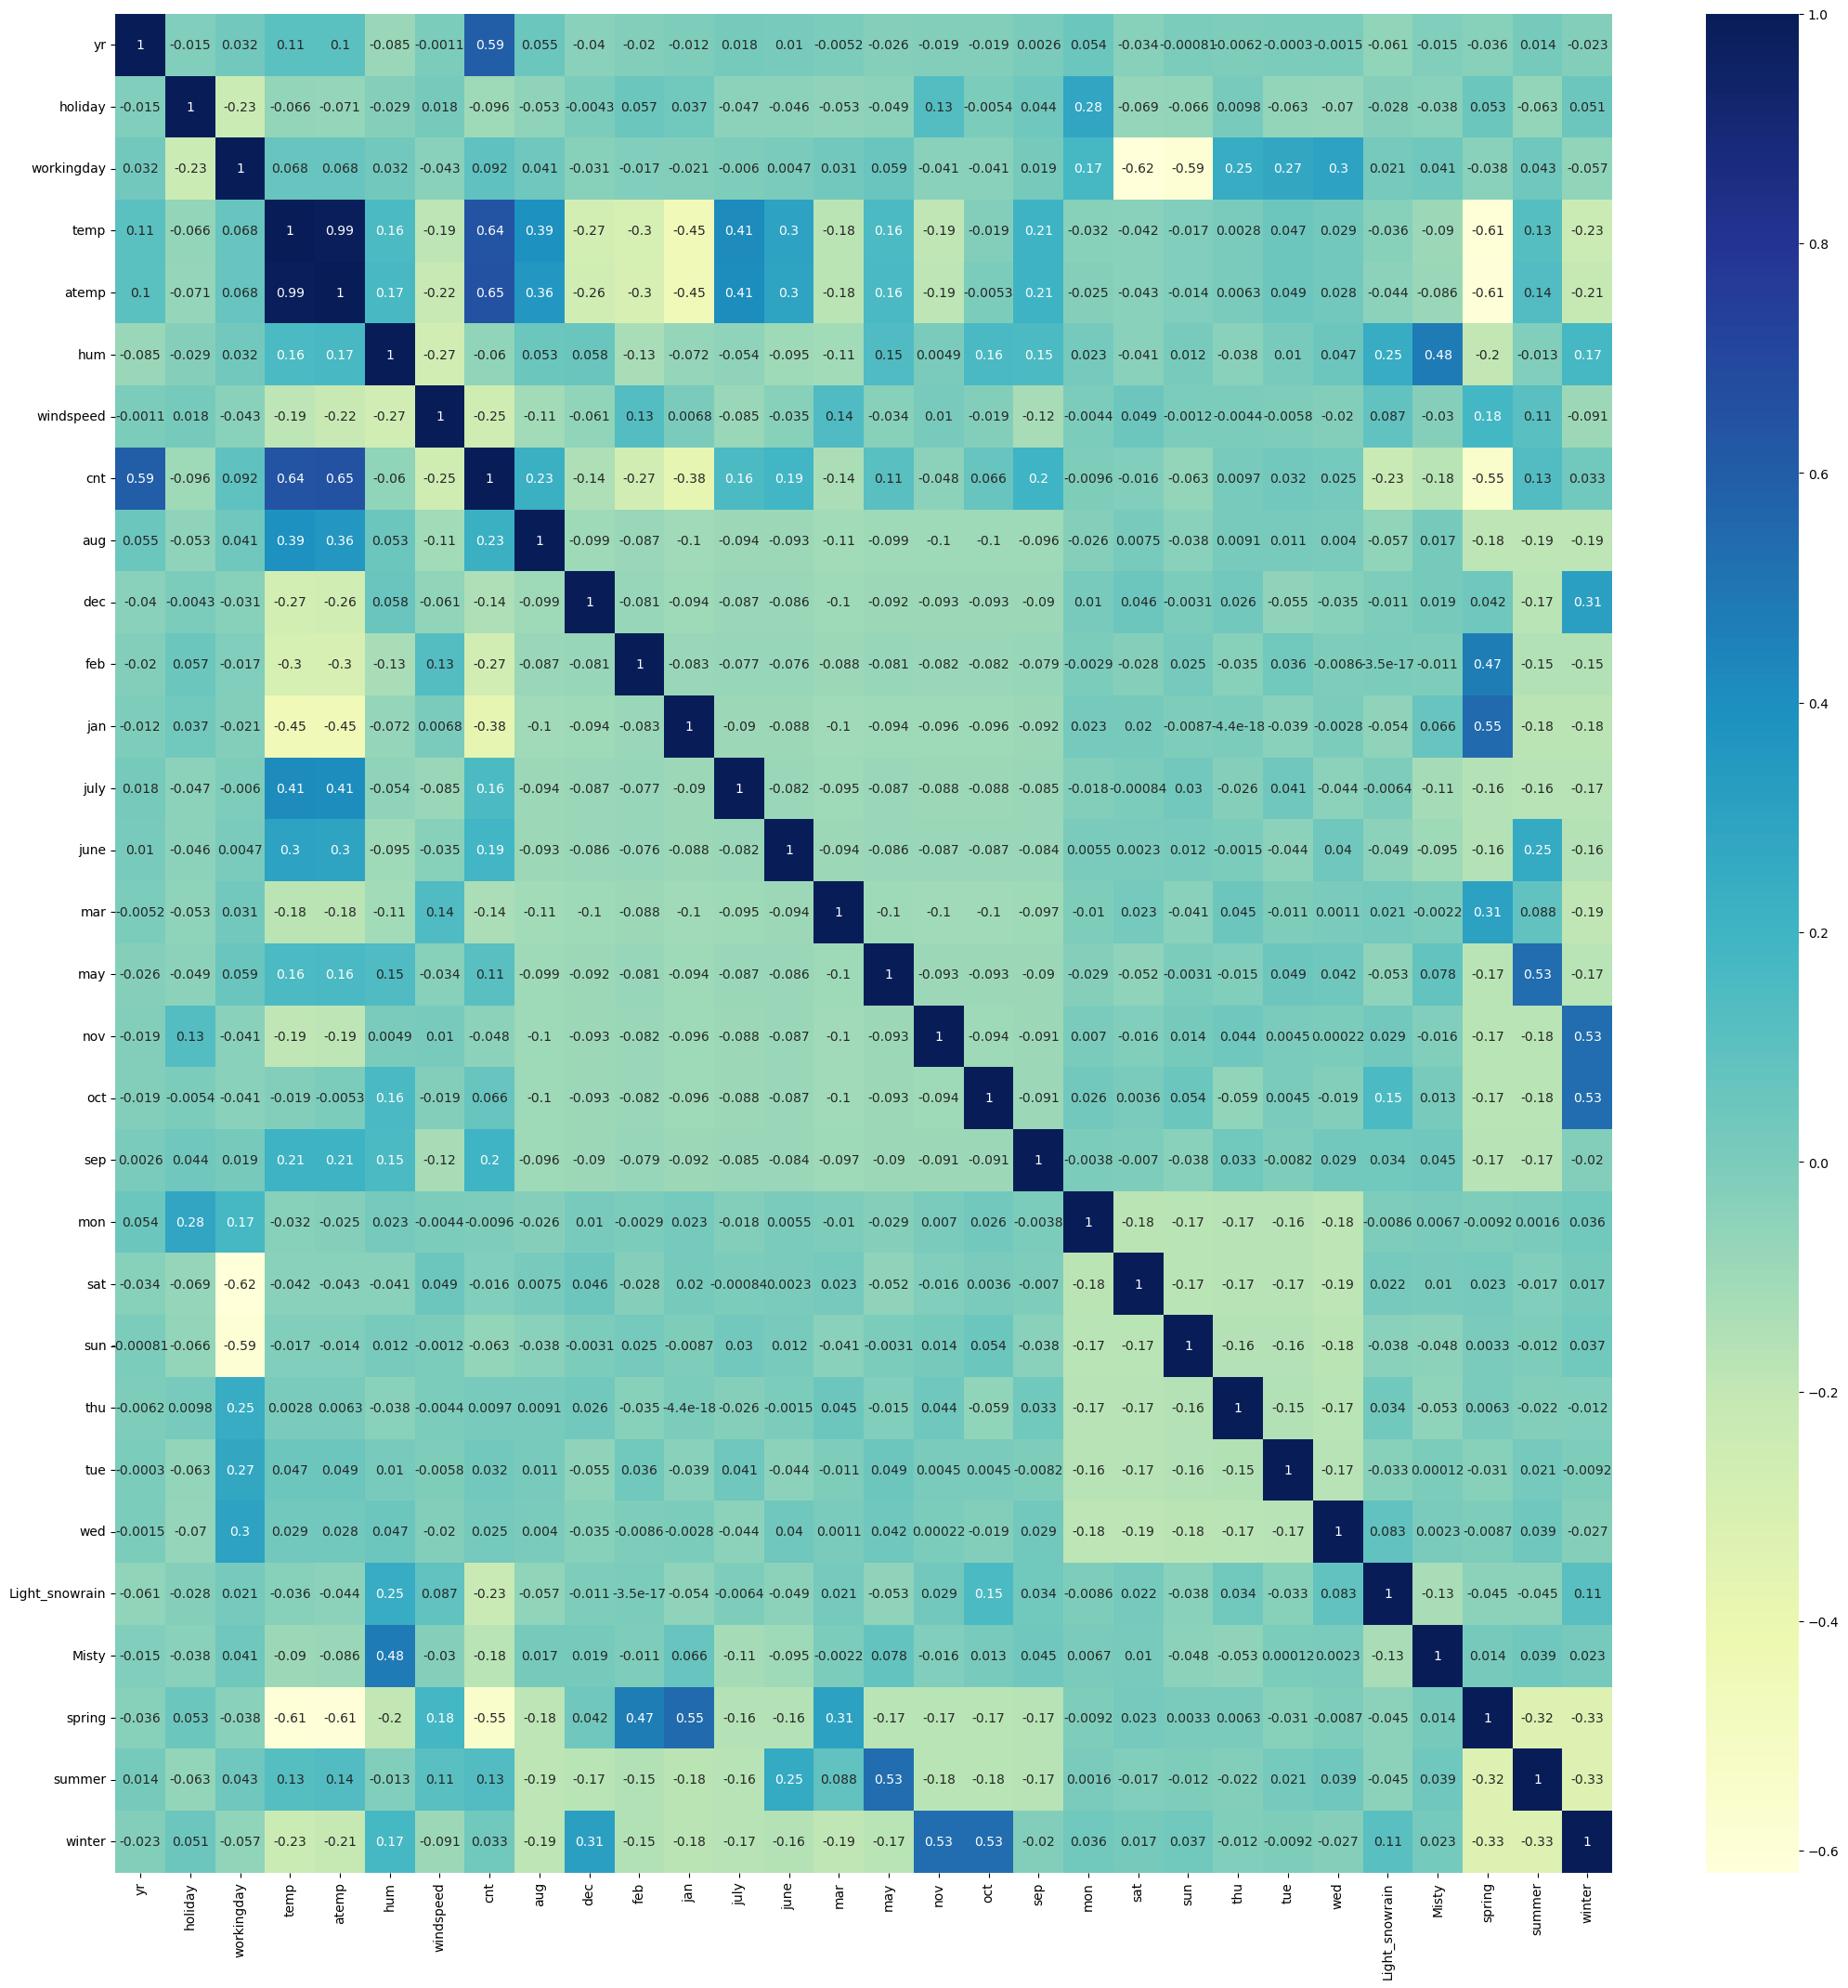

In [18]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 26))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### cnt seems to have correlation with 
- year
- temp

### Other correlations
- Misty and humidity show correlation. 
- Spring season with Jan and Feb month
- Summer season with may month and Winter season with oct and nov month show good correlation.

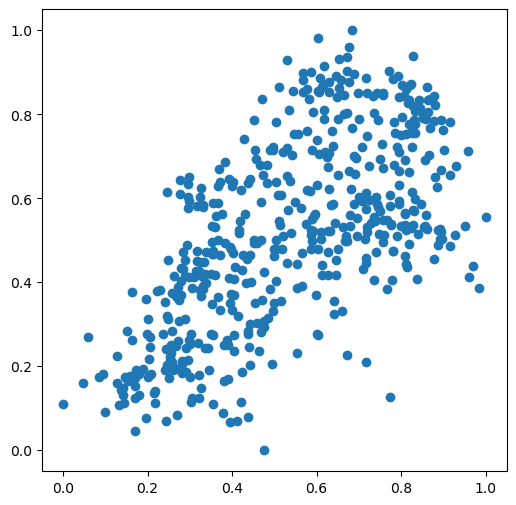

In [19]:
# Visualizing temp and cnt

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [20]:
# Building linear model

y_train = df_train.pop('cnt')
X_train = df_train

In [21]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [22]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 13),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 15),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [23]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [24]:
# rejected columns

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [25]:
X_train_selected = X_train[col]

##  5. Building a linear model

In [26]:
# common function for vif calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [27]:
# Calculate the VIFs for the new model

vif_features = vif(X_train_selected)
print(vif_features)

          Features    VIF
2       workingday  50.69
8              sat  12.20
9              sun  11.79
12          spring   5.02
3             temp   3.62
14          winter   3.49
1          holiday   2.91
13          summer   2.61
4              hum   1.91
11           Misty   1.57
6             july   1.49
7              sep   1.30
10  Light_snowrain   1.25
5        windspeed   1.20
0               yr   1.03


In [28]:
import statsmodels.api as sm
from sklearn.metrics import r2_score


# 1st iteration of linear regression model

X_train_lm_1 = sm.add_constant(X_train_selected)
regression_model_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.13e-191
Time:                        00:28:12   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1989      0.028      7.

In [29]:
# we find that VIF of workingday is very high, so we can drop that

X_train_selected = X_train_selected.drop(['workingday'], axis = 1)
vif_features = vif(X_train_selected)
print(vif_features)

          Features    VIF
3              hum  28.28
2             temp  16.06
4        windspeed   4.68
11          spring   4.03
13          winter   3.37
12          summer   2.78
10           Misty   2.30
0               yr   2.08
5             july   1.59
6              sep   1.39
9   Light_snowrain   1.24
7              sat   1.23
8              sun   1.23
1          holiday   1.06


In [30]:
# 2nd iteration of linear regression model

X_train_lm_2 = sm.add_constant(X_train_selected)
regression_model_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(regression_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.13e-191
Time:                        00:28:12   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2826      0.034      8.

In [31]:
# we find that VIF of humidity is very high, so we can drop that

X_train_selected = X_train_selected.drop(['hum'], axis = 1)
vif_features = vif(X_train_selected)
print(vif_features)

          Features   VIF
2             temp  5.18
3        windspeed  4.62
11          summer  2.23
10          spring  2.13
0               yr  2.07
12          winter  1.84
4             july  1.59
9            Misty  1.55
5              sep  1.34
6              sat  1.23
7              sun  1.22
8   Light_snowrain  1.08
1          holiday  1.06


In [32]:
# 3rd iteration of linear regression model

X_train_lm_3 = sm.add_constant(X_train_selected)
regression_model_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(regression_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.73e-189
Time:                        00:28:12   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2039      0.029      6.

In [33]:
# We can drop sat variable as it has high p-value

X_train_selected = X_train_selected.drop(['sat'], axis = 1)
vif_features = vif(X_train_selected)
print(vif_features)

          Features   VIF
2             temp  5.14
3        windspeed  4.60
10          summer  2.22
9           spring  2.11
0               yr  2.07
11          winter  1.82
4             july  1.59
8            Misty  1.55
5              sep  1.34
6              sun  1.18
7   Light_snowrain  1.08
1          holiday  1.05


In [34]:
# 4th iteration of linear regression model

X_train_lm_4 = sm.add_constant(X_train_selected)
regression_model_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(regression_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.45e-190
Time:                        00:28:12   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2063      0.029      7.

In [35]:
# We can drop july variable as it has high p-value

X_train_selected = X_train_selected.drop(['july'], axis = 1)
vif_features = vif(X_train_selected)
print(vif_features)

          Features   VIF
3        windspeed  4.59
2             temp  3.91
0               yr  2.07
8           spring  2.02
9           summer  1.90
10          winter  1.66
7            Misty  1.55
4              sep  1.23
5              sun  1.18
6   Light_snowrain  1.08
1          holiday  1.05


In [36]:
# 5th iteration of linear regression model

X_train_lm_5 = sm.add_constant(X_train_selected)
regression_model_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(regression_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.51e-189
Time:                        00:28:12   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1983      0.029      6.

In [37]:
# We can drop spring variable as it has high p-value

X_train_selected = X_train_selected.drop(['spring'], axis = 1)
vif_features = vif(X_train_selected)
print(vif_features)

         Features   VIF
2            temp  3.72
3       windspeed  3.08
0              yr  2.00
8          summer  1.56
7           Misty  1.48
9          winter  1.39
4             sep  1.21
5             sun  1.16
6  Light_snowrain  1.08
1         holiday  1.04


In [38]:
# 6th iteration of linear regression model

X_train_lm_6 = sm.add_constant(X_train_selected)
regression_model_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(regression_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.88e-189
Time:                        00:28:12   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1350      0.017      8.

## 6. Residual Analysis of the train data and validation

In [40]:
y_train_pred = regression_model_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

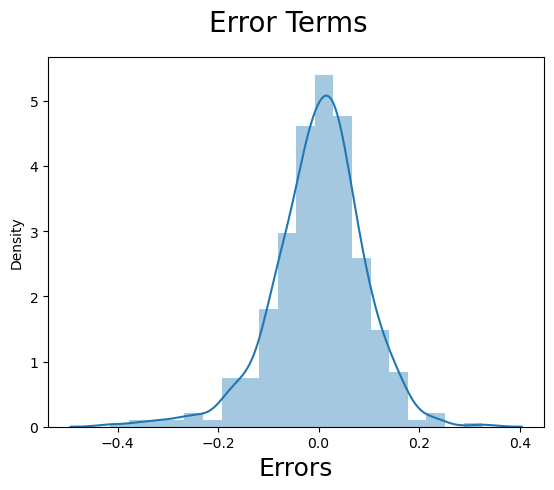

In [41]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

##### Error terms seems to follow normal distribution

In [42]:
vif_features = vif(X_train_selected)
print(vif_features)

         Features   VIF
2            temp  3.72
3       windspeed  3.08
0              yr  2.00
8          summer  1.56
7           Misty  1.48
9          winter  1.39
4             sep  1.21
5             sun  1.16
6  Light_snowrain  1.08
1         holiday  1.04


VIF is less than 3.72, which is low and seems good. The independent variables are not highly correlated with each other.

### Homoscedasticity

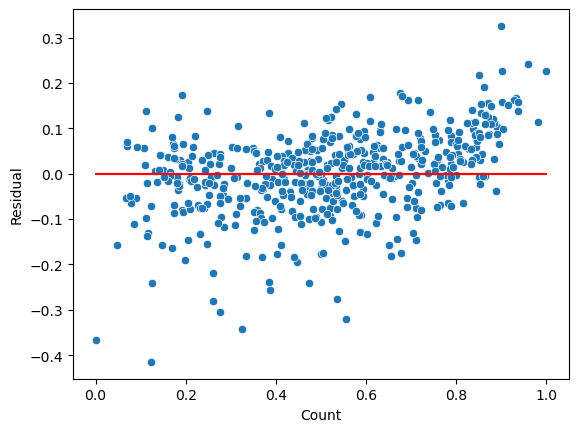

In [49]:
# Assumption: The residuals have constant variance (homoscedasticity).

y_train_pred = regression_model_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(x = y_train,y = residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

The spread of the residuals is roughly constant across all levels of the fitted values.

## 7. Making Predictions

In [43]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [44]:
y_test = df_test.pop('cnt')
X_test = df_test
final_columns = X_train_selected.columns

X_test = X_test[final_columns]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

y_pred = regression_model_6.predict(X_test_lm)
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7958

## 8. Model Evaluation

Text(0, 0.5, 'y_pred')

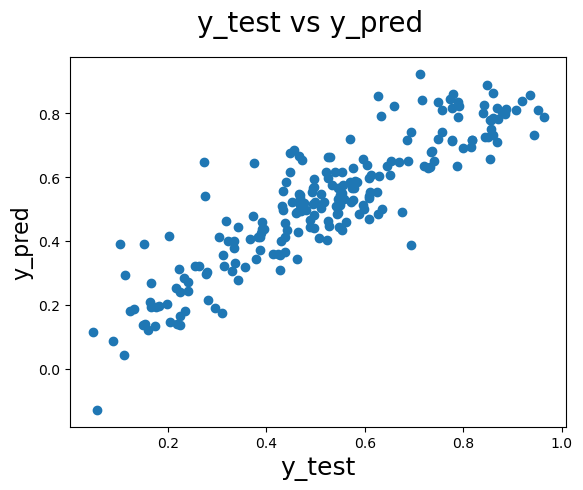

In [45]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [46]:
r2_score(y_test, y_pred)

0.795827212895075

### Comparision between training and test dataset

- Train dataset R^2          : 0.837
- Test dataset R^2           : 0.795
